# Next Word Prediction Using Stacked LSTM Networks in Deep Learning

The text dataset is a children stories which is taken from kaggle. Using this dataset, a next word predicting model has been trained using stacked LSTM.

In [3]:
!kaggle datasets download -d edenbd/children-stories-text-corpus

Dataset URL: https://www.kaggle.com/datasets/edenbd/children-stories-text-corpus
License(s): CC0-1.0
children-stories-text-corpus.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref=zipfile.ZipFile("children-stories-text-corpus.zip","r")
zip_ref.extractall()
zip_ref.close()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [6]:
with open('cleaned_merged_fairy_tales_without_eos.txt', 'r', encoding='UTF-8') as file:
    content = file.read()
print(content[:500])

The Happy Prince.
HIGH above the city, on a tall column, stood the statue of the Happy Prince.  He was gilded all over with thin leaves of fine gold, for eyes he had two bright sapphires, and a large red ruby glowed on his sword-hilt.
He was very much admired indeed.  “He is as beautiful as a weathercock,” remarked one of the Town Councillors who wished to gain a reputation for having artistic tastes; “only not quite so useful,” he added, fearing lest people should think him unpractical, which h


In [7]:
#removing some punctuations using regex
def reg(text):
    pattern=r"[^\w\s\.\,\;]"
    processed=re.sub(pattern,'',text)  
    return processed

reg_text=reg(content)

This is a huge datasets for a next word predicting model. First 1000000 strings have taken from it so that it can be handled by the system and also to train it quickly.

In [9]:
reg_text=reg_text.replace("\n"," ")
txt=reg_text[:1000000]
txt[:1000]

'The Happy Prince. HIGH above the city, on a tall column, stood the statue of the Happy Prince.  He was gilded all over with thin leaves of fine gold, for eyes he had two bright sapphires, and a large red ruby glowed on his swordhilt. He was very much admired indeed.  He is as beautiful as a weathercock, remarked one of the Town Councillors who wished to gain a reputation for having artistic tastes; only not quite so useful, he added, fearing lest people should think him unpractical, which he really was not. Why cant you be like the Happy Prince asked a sensible mother of her little boy who was crying for the moon.  The Happy Prince never dreams of crying for anything. I am glad there is some one in the world who is quite happy, muttered a disappointed man as he gazed at the wonderful statue. He looks just like an angel, said the Charity Children as they came out of the cathedral in their bright scarlet cloaks and their clean white pinafores. How do you know said the Mathematical Maste

In [10]:
len(txt)

1000000

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

For vectorization, "Tokenizer" object has been used. "fit_on_texts" function allocated a number for each word in that text.

In [13]:
token=Tokenizer()
token.fit_on_texts([txt])

In [80]:
# Showing index of word
token_word=token.word_index

"texts_to_sequences" function converted the text into a list of tokens corresponding the word.

In [16]:
token_line=token.texts_to_sequences([txt])[0]
token_len=len(token_line)
token_len

191738

In [82]:
token_line[:15]

[1, 209, 72, 302, 444, 1, 583, 29, 4, 1030, 3394, 182, 1, 1283, 5]

The whole token sequences have been made a array having (n,4) dimension. So that for every row first three elements can be used as input and fourth element as output.

In [86]:
input=[]
for i in range(4*(token_len//4)-3):
    input.append(token_line[i:i+4])
input[:10]

[[1, 209, 72, 302],
 [209, 72, 302, 444],
 [72, 302, 444, 1],
 [302, 444, 1, 583],
 [444, 1, 583, 29],
 [1, 583, 29, 4],
 [583, 29, 4, 1030],
 [29, 4, 1030, 3394],
 [4, 1030, 3394, 182],
 [1030, 3394, 182, 1]]

Here the splitting has been done which was stated above. "x" is the input and "y_" is the output.

In [21]:
x=[]
y_=[]

for i in input:
    x.append(i[:-1])
    y_.append(i[-1])
x=np.array(x)
y_=np.array(y_)
print(f"shape of x: {x.shape}")
print(f"shape of y: {y_.shape}")

shape of x: (191733, 3)
shape of y: (191733,)


In [22]:
x_col=x.shape[1]
print(f"total column in x: {x_col}")

total column in x: 3


We can notice that token started from 1. So to include 0, "+1" business has been done here.

In [24]:
total_word=len(token.word_index)
total_word=total_word+1
total_word

9234

This is a multiclass classification. So the output can't be just a number. So, the categorization has been done using "to_categorical" function. Also notice that, the output can be any word from our word vocabulary. so, the "total_word" has been taken as length of one output.  

In [26]:
y=to_categorical(y_,num_classes=total_word)
y.shape

(191733, 9234)

In [27]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, LSTM, Embedding,Dropout

1. Word embedding has been done to create a array corresponding every unique word/token.
2. Then LSTM layers have been used for finding the pattern.
3. To reduce overfitting droupout has been used.
4. As activation function, Softmax has been used because it is a multiclass classification problem.

In [29]:
model=Sequential()

model.add(keras.Input(shape=(x_col,)))
model.add(Embedding(total_word,100))
model.add(LSTM(500, return_sequences=True))
model.add(LSTM(500))
model.add(Dropout(0.5))
model.add(Dense(total_word,activation="softmax"))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 3, 100)         │       923,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 500)         │     1,202,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 500)            │     2,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 9234)           │     4,626,234 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,753,634 (33.39 MB)

 Trainable params: 8,753,634 (33.39 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [31]:
# Using earlystopping to save from overfitting

callback=keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
)

In [32]:
history=model.fit(x,y,epochs=100, batch_size=50, callbacks=callback)  #, validation_data=(x_test,y_test)

Epoch 1/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 91s 23ms/step - accuracy: 0.0769 - loss: 6.3871
Epoch 2/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 84s 22ms/step - accuracy: 0.1233 - loss: 5.5513
Epoch 3/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.1438 - loss: 5.2408
Epoch 4/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.1580 - loss: 5.0369
Epoch 5/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 84s 22ms/step - accuracy: 0.1695 - loss: 4.8613
Epoch 6/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.1847 - loss: 4.6762
Epoch 7/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 84s 22ms/step - accuracy: 0.1975 - loss: 4.5126
Epoch 8/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 84s 22ms/step - accuracy: 0.2139 - loss: 4.3399
Epoch 9/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.2347 - loss: 4.1209
Epoch 10/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.2541 - loss: 3.9301
Epoch 11/100
3835/3835 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.2750 - loss: 3.72

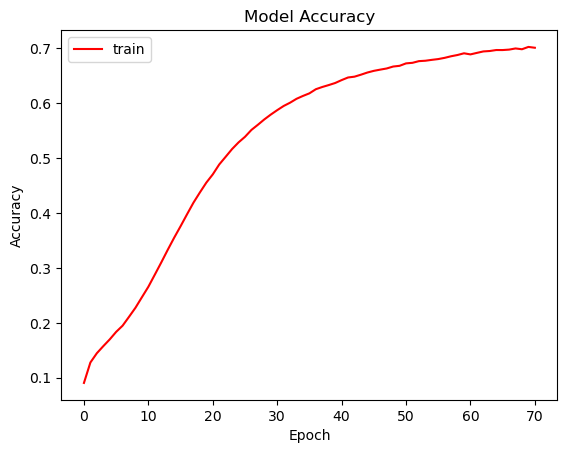

In [33]:
plt.plot(history.history["accuracy"],color="red",label="train")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

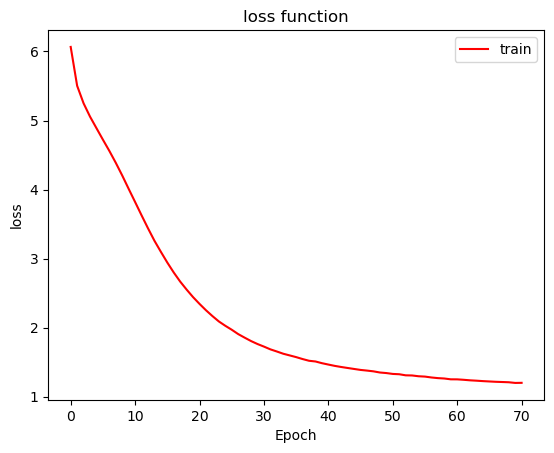

In [34]:
plt.plot(history.history["loss"],color="red",label="train")
plt.title('loss function')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Predicting next word using this trained model.

In [36]:
def predict_next(inp_text):
    token_line=token.texts_to_sequences([inp_text])[0]
    token_len=len(token_line)
    if token_len<x_col:
        input=pad_sequences([token_line],maxlen=x_col, padding="pre")
    elif token_len>x_col:
        input=token_line[-x_col:]
    else:
        input=token_line
    pred=model.predict(np.array([input]))
    predict_index=np.argmax(pred)
    for word,index in token.word_index.items():
        if index==predict_index:
            print(word)
    return

In [37]:
predict_next("stood the statue of")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
the


The original line was "...stood the statue of the Happy Prince."

In [39]:
predict_next("when they finally plodded")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
came


The original line was "...when they finally plodded home." 

In [41]:
predict_next("He is as beautiful")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
as


The original line was "...He is as beautiful as a weathercock..."

So, this model is not predicting very well. The training accuracy is 71.96% which is not so good. 
However, we can use larger dataset and also more LSTM layers to get good accuracy and prediction if the system's capacity permits.